In [3]:
!pip install pandas-profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27090 sha256=50144301a152a5cfe7dd9ce75755af8e85a6e262214e66778dec2c22702dff5b
  Stored in directory: c:\users\gru\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.47.0
    Uninstalling tqdm-4.47.0:
      Successfully uninstalled tqdm-4.47.0


In [2]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import pandas_profiling as pdp

# импорт данных
df = pd.read_csv('netflix_titles.csv')

In [3]:
#Создание отчета по разведочному анализу данных
report = pdp.ProfileReport(df, title='Разведочный анализ данных')
report

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Пояснения к разведочному анализу данных

Библиотека pandas profiling определила тип данных в столбце show_id как числовой и даже попыталась вычислить там различные описательные характеристики, но это неверно.

Поскольку, кроме столбца с годом выпуска (release year) числовые переменные отсутствуют, однако, библиотека pandas profiling попыталась найти коррелияцию между release year и show_id, думая, что это числовые значения, что также неверно.

# Пропуски

Как показало ислледование датасета, пропусков не очень много.
Пропуски присутствуют в колонках director (режиссер), cast (актеры) и country (страна).

Наибольшее количество пропусков в столбце director (режиссер) - 31.6%
В остальных столбцах количество пропусков не превышает 10%.

Поскольку типы данных в этих столбцах не являются числовыми, то заполнить их модой, или средним значением не представляется возможным. Наиболее оптимальным видится заполнение пропусков константой, например 'no_data'.

In [13]:
#Заменим строки с пропущенными значениями в столбце director константой 'no_data'

df = df.fillna('no_data')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,no_data,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,no_data,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,no_data,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


# Построим график зависимости количества контента на Netflix от года выпуска

Text(0, 0.5, 'Кол-во контента')

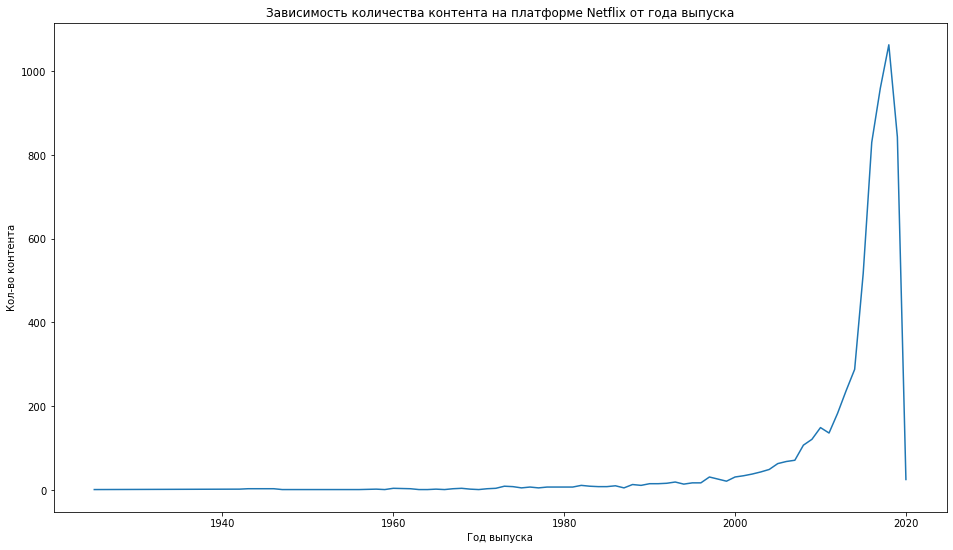

In [74]:
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 16,9

film_year =df[['show_id','release_year']].groupby('release_year').count()

plt.plot(film_year.index, film_year.show_id)
plt.title('Зависимость количества контента на платформе Netflix от года выпуска')
plt.xlabel('Год выпуска')
plt.ylabel('Кол-во контента')

# Пояснение к графику зависимости количества контента на платформе Nextflix от года выпуска

Наибольшее количества контента на платформе с годом выхода с 2015 по 2019 годы, что, в принципе закономерно. Количество контента в мире также стремительно растет.
Резкий спад в конце предположительно означает недостаточное количество данных для 2020.
Также видно, что контента, выпущенного с 1980 по 2010 относительно немного на платформе. Предположительно, это связано с тем, что мало людей готовы платить за устаревший контент, который они уже, вероятно, видели.

# Найдем топ-10 категорий возрастного рейтинга по количеству контента на Netflix

Text(0, 0.5, 'Кол-во контента')

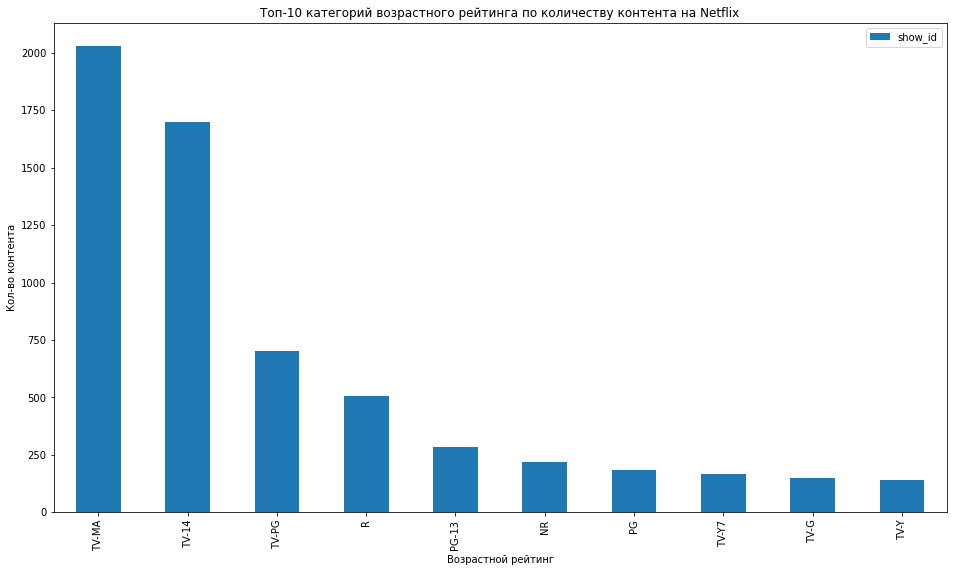

In [83]:
rating_count =df[['show_id','rating']].groupby('rating').count().sort_values(by='show_id', ascending=False).head(10)
rating_count.plot(kind='bar',
                  title='Топ-10 категорий возрастного рейтинга по количеству контента на Netflix')
plt.xlabel('Возрастной рейтинг')
plt.ylabel('Кол-во контента')
                  

Из графика видно,что наибольшее количество контента на Netflix выходит в категориях:
TV-MA: Только для зрителей от 17 лет
TV-14: Для зрителей от 14 лет
TV-PG: С одобрения взрослых
R: Фильм, получивший рейтинг R, скорее всего содержит сексуальные сцены, эпизоды с употреблением наркотиков, нецензурную брань, фрагменты с насилием и т.д.
PG-13: Просмотр не желателен детям до 13 лет. Данный рейтинг показывает, что оценённый фильм может быть неподходящим для детей. Родители должны быть особенно осторожны, разрешая своим маленьким детям просмотр.

Напрашивается логический вывод, что данный сервис ориентирован примущественно на взрослую и подростковую категорию.
